In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

plt.style.use('seaborn-whitegrid')
np.set_printoptions(precision=4) 
np.set_printoptions(suppress=True)

In [3]:
from scipy import stats
import sympy as sy
import fractions as fr

To proceed with inferential statistics, there is no way to circumvent **probability theory** and it's undoubtedly the most important mathematical subject should you ever know in your life. Once probability view deeply implanted in your mind, you would have a revolutionary world view.

Here we will review the probability theory in a textbook style, i.e. start from defining sets.

# Basic Concepts Refresh

## Sets

A set is a collection of _distinct elements_, for instance, $(1, 2, 3)$ is a set, but $(2, 2, 3)$ isn't.

In [4]:
s = sy.FiniteSet(2, 3, 4, 5, 6); s

FiniteSet(2, 3, 4, 5, 6)

In [5]:
s1 = sy.FiniteSet(2, 1/2, fr.Fraction(1,2), 8)
s1

FiniteSet(1/2, 0.5, 2, 8)

Check if $2$ is in the set $S_1$

In [6]:
x = 2
if x in s1:
    print(f'{x} is in the set!')

2 is in the set!


Convert a list into a set, the list needs unpacking with $*$.

In [7]:
s3_list = [1, 3, 5, 7, 8]
s3 = sy.FiniteSet(*s3_list); s3

FiniteSet(1, 3, 5, 7, 8)

## Subsets, Supersets and Power Sets

Now define two sets, $a$ is a **superset** of $b$ ($a\supseteq b$), then $b$ is called a **subset** of $a$ ($b\subseteq a$). 

In [8]:
a = sy.FiniteSet(1,2,3,4,5)
b = sy.FiniteSet(2,3,4)

In this example, $a$ is a **proper superset** of $b$ denoted as $a\supset b$, $b$ is a **proper subset** of $a$ denoted as $b\subset a$.

The methods ```is_subset``` and ```is_superset``` are doing exactly as their names say.

In [9]:
b.is_subset(a)

True

In [10]:
a.is_superset(b)

True

The **powerset** is set contains all subsets, including the empty set and itself.

In [11]:
b.powerset()

FiniteSet(FiniteSet(2), FiniteSet(2, 3), FiniteSet(2, 4), FiniteSet(2, 3, 4), FiniteSet(3), FiniteSet(3, 4), FiniteSet(4), EmptySet)

Any sets are their own subset, but not their proper subset.

In [12]:
b.is_subset(b)

True

In [13]:
b.is_proper_subset(b)

False

## Set Operations

Define two sets again.

In [14]:
a = sy.FiniteSet(1,2,3)
b = sy.FiniteSet(2,3,4)
display(a)
display(b)

FiniteSet(1, 2, 3)

FiniteSet(2, 3, 4)

**Union** and **intersection** are sympy object methods, the same as we've learned in high school.

In [15]:
display(a.union(b))
display(a.intersect(b))

FiniteSet(1, 2, 3, 4)

FiniteSet(2, 3)

## Python Built-in Sets And Operations

Sets operations are fairly common in general programming, therefore Python has built-in operations for sets. Here are examples using built-in function. 

We define sets in Python with ```{}```, which are the same for the dictionaries.

In [16]:
a = {1, 3, 5, 7, 9}
b = {1, 7, 10}

In [17]:
type(a)

set

Union operation.

In [18]:
a | b

{1, 3, 5, 7, 9, 10}

or

In [19]:
a.union(b)

{1, 3, 5, 7, 9, 10}

Intersection.

In [20]:
a & b

{1, 7}

Or

In [21]:
a.intersection(b)

{1, 7}

Set difference.

In [22]:
a - b

{3, 5, 9}

In [23]:
a.difference(b)

{3, 5, 9}

## Cartesian Product

The famous **Cartesian product** is defined mathematically as below.

Two sets multiply each other, the result presents all the possible ordered paired, the first element from $A$, the second element from $B$.

$$
A\times B=\{(a,b)\mid a\in A\ {\mbox{ and }}\ b\in B\}
$$

A visual example would be helpful. Define two sets, then compute the Cartesian product by multiplication.

In [24]:
x = sy.FiniteSet(*list(range(1, 6)))
y = sy.FiniteSet(*list(range(2, 7)))
z = x*y # Cartesian producet
z

ProductSet(FiniteSet(1, 2, 3, 4, 5), FiniteSet(2, 3, 4, 5, 6))

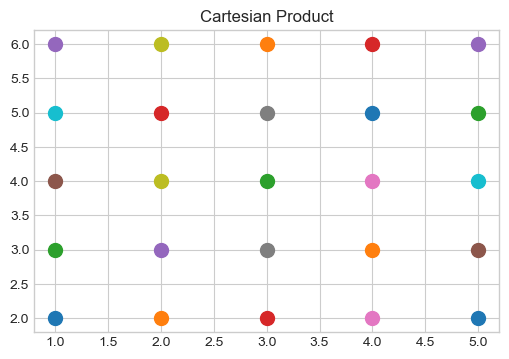

In [25]:
_, ax = plt.subplots(figsize=(6, 4), dpi=100)

for i in z:
    ax.scatter(i[0], i[1], s = 100)

ax.grid(True)
ax.set(title='Cartesian Product')
plt.show()

Here's a more concrete example of Cartesian product, suppose H&M has a type of dress with different parameters, a Cartesian product will show them all combinations they could have. For instance, a dress with parameters $('XL', 'blue', 'polyester')$.

In [26]:
# size = sy.FiniteSet('S', 'M', 'L', 'XL')
colours = sy.FiniteSet('red', 'black', 'blue', 'white')
material = sy.FiniteSet('wool', 'cotton', 'polyester')
colours * material

ProductSet(FiniteSet(black, blue, red, white), FiniteSet(cotton, polyester, wool))

## Probability and Event

After demonstrating so many sets theory, but how are they used in probability theory?

Dice rolling problem never gets old. To answer the question: _what is the probability of rolling an odd number_? We will show how to answer the question with set operations.

In [27]:
s = sy.FiniteSet(1,2,3,4,5,6) 
odd = sy.FiniteSet(1,3,5)
p = len(odd)/len(s)
p

0.5

This is vastly intuitive, just the proportion of odd sides over all sides.

## Two Dice Problem

Two dice problem is slightly more complicated. Now we are asking: _what's the probability of getting a $7$ while rolling them together_.

Create a dictionary to hold the Cartesian product of two dice and its sum. The ```.update``` function is for adding elements in the dictionary if the updated key didn't exist.

In [30]:
from scipy import special

In [32]:
dice_cartesian = {}
for i in range(1, 7):
    for j in range(1, 7):
        dice_cartesian.update({(i, j): i + j})
dice_cartesian

{(1, 1): 2,
 (1, 2): 3,
 (1, 3): 4,
 (1, 4): 5,
 (1, 5): 6,
 (1, 6): 7,
 (2, 1): 3,
 (2, 2): 4,
 (2, 3): 5,
 (2, 4): 6,
 (2, 5): 7,
 (2, 6): 8,
 (3, 1): 4,
 (3, 2): 5,
 (3, 3): 6,
 (3, 4): 7,
 (3, 5): 8,
 (3, 6): 9,
 (4, 1): 5,
 (4, 2): 6,
 (4, 3): 7,
 (4, 4): 8,
 (4, 5): 9,
 (4, 6): 10,
 (5, 1): 6,
 (5, 2): 7,
 (5, 3): 8,
 (5, 4): 9,
 (5, 5): 10,
 (5, 6): 11,
 (6, 1): 7,
 (6, 2): 8,
 (6, 3): 9,
 (6, 4): 10,
 (6, 5): 11,
 (6, 6): 12}

Python dictionary has a method ```.items()``` that lists all key-value pairs in tuples. We'll make use of this method in the loop below.

In [33]:
special.perm(26, 3)  # permutation

15600.0

Use ```defaultdict``` from ```collections``` module, it creates a dictionary which doesn't report errors and suitable for counting. We pass ```list``` as the _default factory_, meaning initialising values as lists whenever the key is given. 

In [34]:
from collections import defaultdict

dice_count = defaultdict(list) 
for i,j in dice_cartesian.items():
    dice_count[j].append(i)
dice_count

defaultdict(list,
            {2: [(1, 1)],
             3: [(1, 2), (2, 1)],
             4: [(1, 3), (2, 2), (3, 1)],
             5: [(1, 4), (2, 3), (3, 2), (4, 1)],
             6: [(1, 5), (2, 4), (3, 3), (4, 2), (5, 1)],
             7: [(1, 6), (2, 5), (3, 4), (4, 3), (5, 2), (6, 1)],
             8: [(2, 6), (3, 5), (4, 4), (5, 3), (6, 2)],
             9: [(3, 6), (4, 5), (5, 4), (6, 3)],
             10: [(4, 6), (5, 5), (6, 4)],
             11: [(5, 6), (6, 5)],
             12: [(6, 6)]})

Create another dictionary holding all sums of dice and corresponding probabilities.

In [35]:
Prob = {i:round(len(j)/6**2, 4) for i,j in dice_count.items()}; Prob

{2: 0.0278,
 3: 0.0556,
 4: 0.0833,
 5: 0.1111,
 6: 0.1389,
 7: 0.1667,
 8: 0.1389,
 9: 0.1111,
 10: 0.0833,
 11: 0.0556,
 12: 0.0278}

The example above actually is more about Python techniques, it also can be conveniently solved without making a fuss, as below:

In [36]:
def dice_prob(number):
    dice1, dice2 = list(range(1, 7)), list(range(1, 7))
    cartesian_dice = [(i, j) for i in dice1 for j in dice2
                      ]  # list comprehension to create Cartesian product
    ocurrence = 0
    for element in cartesian_dice:
        if np.sum(list(element)) == number:
            ocurrence += 1
    print('The probability of {} while rolling two dice is {:.2f}%'.format(
        number, ocurrence / 6**2 * 100))


In [37]:
dice_prob(7)

The probability of 7 while rolling two dice is 16.67%


## Combination And Permutation

Again, high school skills, two question to help differentiate them. 
<ol>
<li>Pick 3 letters from English alphabet, how many ways to choose? <i>Use combination.</i></li> 
<li>Pick 3 letters from English alphabet to construct a word (doesn't have to be meaningful), how many ways to choose? <i>Use permutation.</i><\li>
</ol>

Just remember: whenever needs certain order, use permutation, like the second question above, 'dog' and 'god' are different words though letters are the same. We don't need to memorise formula, but still FYI

$$
_nC_N = \frac{N!}{n!(N-n)!}\\
_nP_N = \frac{N!}{(N-n)!}
$$

In [38]:
from scipy import special

In [39]:
special.comb(26, 3) # combination

2600.0

In [40]:
special.perm(26, 3) # permutation

15600.0

# Conditional Probability, Multiplication Law and Independence

All above are just warm-up, from here on comes the real deal of probability theory.

The probability of A given B, so called **conditional probability**, defined as:

$$
\begin{equation}
\frac{P(A\cap B)}{P(B)}=P(A|B)
\end{equation}
$$

It is best to be demonstrated by a joint probability table, which is essentially a discrete numeric form of 3D distribution. 

Here I want to introduce a module of draw text-style table, particular useful when you working on shells. Install in jupyter with ```conda install -c conda-forge texttable```.

In [41]:
from texttable import Texttable

In [42]:
table = Texttable()
table.set_cols_align(["l", "c", "c", 'c'])  
table.set_cols_valign(["m", "m", "m", 'm'])
table.add_rows([["", "Have Ht. Disease", " Not Have ", ' Total '],
                ["Male", 0.45, 0.06, 0.51],
                ["Femal", 0.36, 0.13, 0.49],
                ["Total", 0.81, 0.19, 1]])
print(table.draw())

+-------+------------------+------------+---------+
|       | Have Ht. Disease |  Not Have  |  Total  |
+=======+==================+============+=========+
| Male  |      0.450       |   0.060    |  0.510  |
+-------+------------------+------------+---------+
| Femal |      0.360       |   0.130    |  0.490  |
+-------+------------------+------------+---------+
| Total |      0.810       |   0.190    |    1    |
+-------+------------------+------------+---------+


**Marginal probability** is the key concepts, which got its name because located on the margin of a table, it is the sum of all probabilities from the same column or row.

The marginal probability of having heart disease is $81\%$ and marginal probability of not having is $19\%$. 

Here is the question: _what is the probability of not having heart disease given the person is a woman_? Because the condition is that _the person must be a woman_. So the first step is to narrow down the table.

In [43]:
table = Texttable()
table.set_cols_align(["l", "c", "c", 'c'])  
table.set_cols_valign(["m", "m", "m", 'm'])
table.add_rows([["", "Have Ht. Disease", " Not Have ", ' Total '],
                ["Femal", 0.36, 0.13, 0.49]])
print(table.draw())

+-------+------------------+------------+---------+
|       | Have Ht. Disease |  Not Have  |  Total  |
+=======+==================+============+=========+
| Femal |      0.360       |   0.130    |  0.490  |
+-------+------------------+------------+---------+


So the conditional probability of a woman not having heart disease is
$$
\frac{P(A\cap B)}{P(B)} = \frac{.13}{.49}
$$

In [44]:
P_female = 0.49  # the marginal prob of being a women, this is P(B)
P_female_no_disease = 0.13
P_con = P_female_no_disease / P_female
print(
    f'The probability of not having heart disease given the person is a woman is {P_con * 100:.2f}%'
)

The probability of not having heart disease given the person is a woman is 26.53%


From conditional probability it is straightforward to deduct **multiplication law**, simply rearrange the formula
$$
P(A|B)P(B)=P(A\cap B)\\
P(B|A)P(A)=P(B\cap A)
$$

Two events $A$ and $B$ are independent if 
$$
P(A|B)=P(A)\\
P(B|A)=P(B)
$$

Otherwise, the events are dependent.

Then the **independent multiplication law** indicates
$$
P(A)P(B)=P(A\cap B)\\
P(B)P(A)=P(B\cap A)
$$

We will not dive deep into probability problems for now, there will be a full-round training session on <a href='https://github.com/MacroAnalyst/Probability_Theory'>**Probability Theory**</a>.

# Distributions That You Should Know

These are most important probability distributions that you should know by heart. 

## Binomial Distribution

The first one is binomial distribution, we will give a it more extensive coverage, other distributions have similar functions in Python.

A binomial experiment has 4 features:
* A sequence of $n$ identical trials, e.g. throwing darts
* Only two outcomes are possible: _success_ or _failure_, e.g. hitting bullseye or not
* The probability of success $p$ does not change from trial to trial
* Trials are independent events, e.g. first throw doesn't affect the second throw

The **probability mass function(PMF)** of binomial distribution is 

$$
f(k,n,p)=_nC_k p^kq^{n-k}
$$

<p style="font-size:17px">
<p>

<table style="text-align:center; width:50%; text-align:center;font-size: 110% ">
  <tr>
    <th>parameters</th>
    <th>meaning</th>
  </tr>
  <tr>
    <td>$n$</td>
    <td>number of trials</td>
  </tr>
  <tr>
    <td>$k$</td>
    <td>number of specific outcome</td>
  </tr>
  <tr>
    <td>$p$</td>
    <td>probability of success</td>
  </tr>
  <tr>
    <td>$q$</td>
    <td>probability of failure</td>
  </tr>
</table>

Here's a simple example.

A personal banker might meet 50 people enquiring for loan monthly, empirically 30% of them has bad credit history. So calculate probability from 1 to 50 people has bad credit history, meaning calculate 1 person out of 50 has bad credit, 2 persons out of 50 have bad credit, so on so forth till 50 persons (all of them).

Start from a single number could be more intuitive, what's probability that a personal banker to encounter exact $14$ persons of bad credit history in a month?

In [45]:
from scipy import special

In [46]:
n = 50
k = 14  # what is the prob that exact 14 ppl she met had bad credit history?
b = special.comb(50, 14)
p = .3
f_binomial = b * p**k * (1 - p)**(n - k)
print(
    f'The prob of meeting {k} persons who has bad credit history is {(f_binomial * 100):.2f}%.'
)

The prob of meeting 14 persons who has bad credit history is 11.89%.


We can use ```scipy.stats.binom.pmf``` to get an array of PMF.

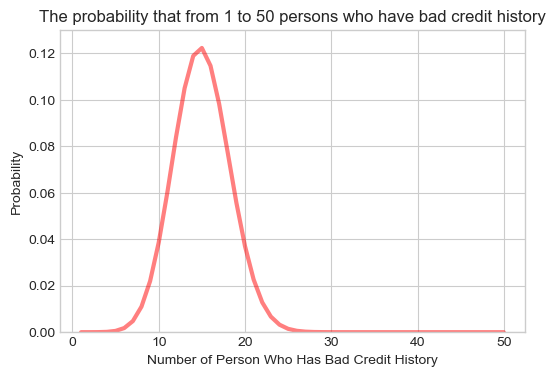

In [47]:
n = 50
p = .3
bad_credit_person = np.arange(1, 51)
prob = stats.binom.pmf(bad_credit_person, n, p)

_, ax = plt.subplots(figsize=(6, 4), dpi=100)

ax.plot(bad_credit_person, prob, lw=3, color='r', alpha=.5)
ax.set(title=
       'The probability that from 1 to 50 persons who have bad credit history',
       xlabel='Number of Person Who Has Bad Credit History',
       ylabel='Probability',
       ylim=[0, .13])
plt.show()

We could interpret the plot with straightforward observation:
<li>Most likely the personal banker would encounter $10$ to $20$ persons who have bad credit history.</li>
<li>Encountering less than $5$ or more than $25$ person are less likely.</li>
<li>The highest possibility is to encounter $50\times .03 = 15$ persons with bad credit.</li>

Next example we can formulate a question by using **cumulative probability distribution**, the SciPy function is ```scipy.stats.binom.cdf```. 

If a stock trader trades $n$ times a month, he has a $p%$ chance of winning the trade, find out the probability that he can win less than $k$ trades a month.

In [48]:
n = 20
p = .55
k = 12
k1, k2 = 14, 4

win_less = stats.binom.cdf(k, n, p)
win_more = 1 - stats.binom.cdf(k, n, p)
win_betw = stats.binom.cdf(14, n, p) - stats.binom.cdf(4, n, p)

print(
    f"If a trader's winning rate is {p * 100:.0f}%, the probability of winning less than {k} times is {win_less * 100:.1f}% if he trades {n} per month."
)
print(
    f"If a trader's winning rate is {p * 100:.0f}%, the probability of winning more than {k} times is {win_more * 100:.1f}% if he trades {n} per month."
)
print(
    f"If a trader's winning rate is {p * 100:.0f}%, the probability of winning between {k1} and {k2} times is {win_betw * 100:.1f}% if he trades {n} per month."
)

If a trader's winning rate is 55%, the probability of winning less than 12 times is 74.8% if he trades 20 per month.
If a trader's winning rate is 55%, the probability of winning more than 12 times is 25.2% if he trades 20 per month.
If a trader's winning rate is 55%, the probability of winning between 14 and 4 times is 94.3% if he trades 20 per month.


Or present in the text table.

In [49]:
table = Texttable()
table.set_cols_align([ "c", "c", 'c'])  
table.set_cols_valign([ "m", "m", 'm'])
table.add_rows([["Win Less", " Win More ", ' Win btw 4~14 '],
                [ win_less, win_more, win_betw]])
print(table.draw())

+----------+------------+----------------+
| Win Less |  Win More  |  Win btw 4~14  |
+==========+============+================+
|  0.748   |   0.252    |     0.943      |
+----------+------------+----------------+


What if the probability of wining changing from 0.1 to 0.8, what is the probability that he wins less than 6 trades, assuming every month he trades 20 times.

In [50]:
win_rate = np.arange(.1, .81, .05)
win_less = stats.binom.cdf(6, 20, win_rate)

data_dict = {'win_rate':win_rate, 'win_less':win_less}
df = pd.DataFrame(data_dict)
df.head()

,win_rate,win_less
0,0.10,0.997614
1,0.15,0.978065
2,0.20,0.913307
3,0.25,0.785782
4,0.30,0.608010


According to the table above, if the trader has at least $60\%$ winning rate, merely $0.6\%$ probability that he wins less then $6$ trades. Marginally higher winning rates are even important for traders in the short run.

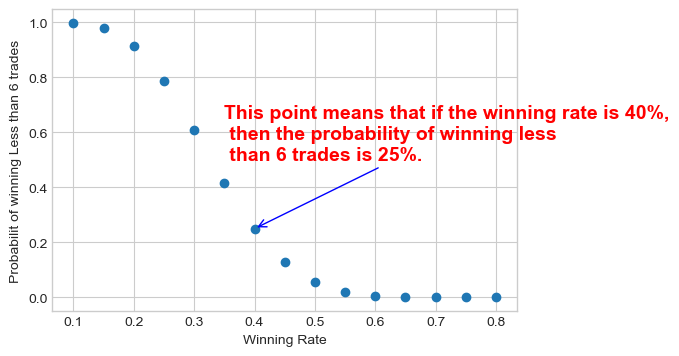

In [51]:
_, ax = plt.subplots(figsize=(6, 4), dpi=100)

ax.scatter(win_rate, win_less)
txt = 'This point means that if the winning rate is 40%,\n then the probability of winning less\n than 6 trades is 25%.'
ax.annotate(txt,
            xy=(df.iloc[6][0], df.iloc[6][1]),
            xytext=(.35, .5),
            weight='bold',
            color='r',
            size=14,
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3',
                            color='b'))
ax.set(xlabel='Winning Rate',
       ylabel='Probabilit of winning Less than 6 trades')
plt.show()

### Binomial Random Variable Generator

In Scipy library, every distribution has a random variable generator named ```.rvs```, we set parameters, the generator will return the randomly generated numbers.

In [52]:
n = 100
p = 0.3
bino = stats.binom.rvs(n, p, size = 10000)

The red vertical line in the graph below is the mean, because binomial distribution is a symmetric distribution, thus the mean should theoretically have the highest draw as well.

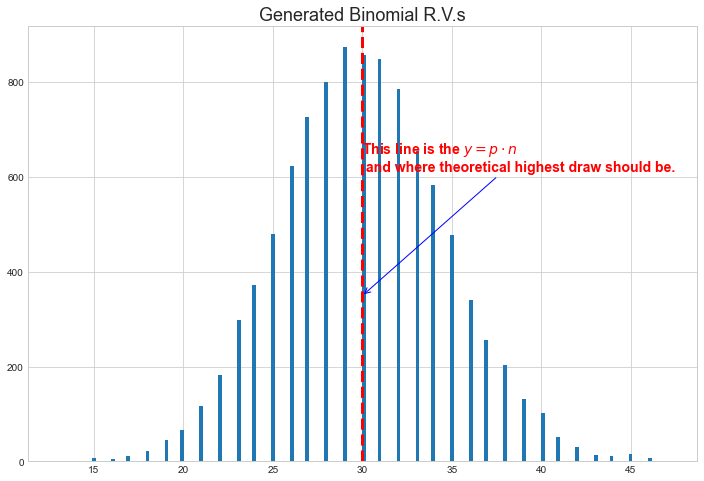

In [53]:
txt = 'This line is the $y =p ⋅ n$ \n and where theoretical highest draw should be.'
fig, ax = plt.subplots(figsize = (12, 8))
h, bins, patches = ax.hist(bino, bins = 160)
ax.axvline(p*n, color = 'r', ls = '--', lw = 3)
ax.annotate(txt, xy = (p*n, h.max()*0.4), xytext = (p*n ,h.max()*0.7), weight = 'bold', color  =  'r', size = 14,
             arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3', color = 'b'))
ax.set_title('Generated Binomial R.V.s', size = 18)
plt.show()

But how to interpret the histogram? 

A concrete example: you are trying to shoot basketball into the basket, your chances of success is $30\%$, what each day you can shoot $100$ rounds, but in the long run, you are mostly like to have $30$ successes each day, and it would be extremely unlikely that you would land a $50$-success.

### Moments of Binomial Distribution

To return moments, use ```.stats``` functions with <code>moments = `msvk`</code>, it is short for _mean_, _skewness_, _variance_ and _kurtosis_.

In [54]:
n = 100
bino_stats = stats.binom.stats(n, p, moments='mvsk')

table = Texttable()
table.set_cols_align(["c", "c", 'c', 'c'])
table.set_cols_valign(["m", "m", 'm', 'm'])
table.add_rows([["mean", " variance ", ' skewness ', 'kurtosis '],
                [bino_stats[0], bino_stats[1], bino_stats[2], bino_stats[3]]])
print(table.draw())

+------+------------+------------+-----------+
| mean |  variance  |  skewness  | kurtosis  |
+======+============+============+===========+
|  30  |     21     |   0.087    |  -0.012   |
+------+------------+------------+-----------+


## Poisson Distribution

When $n\rightarrow\infty$ and $p\rightarrow0$，a binomial distribution approaches a **Poisson distribution** asymptotically, i.e. when $n$ is large and $p$ is small, we can use Poisson to approximate Binomial.

Again with trader's example, if a trader has $1/1000$ probability to encounter a 'wiped-out' in each trade (assume each trade is independent, actually not), and trades $20$ times per month, what is the probability that the trader will encounter twice 'wiped-out' within 5 years?

This problem can be solved by Binomial, the formulation as below

$$
\text{trades} = 20\times 12\times 5=1200\\
P(x=2) = \binom{1200}{2}\Big(\frac{1}{1000}\Big)^2\Big(\frac{999}{1000}\Big)^{1198}
$$

In [55]:
special.comb(1200, 2) * 1 / 1000**2 * (999 / 1000)**1198

0.2169828095260339

The result tells that if a trader keep a frequency of $20$ trades per month, there $21\%$ possibility that he/she gets wiped out twice in next $5$ years.

As we mentioned, Poisson is the limit version of Binomial, it is a suitable case to use, calculate $λ$

$$
\begin{equation}
λ = np = 1200 \times \frac{1}{1000} = 1.2
\end{equation}
$$

it means every 5 years, there is in average 1.2 times of chance to get wiped out.

$$
\begin{equation}
P(x=2)=\frac{λ^ke^{-λ}}{k!}=\frac{1.2^2e^{-1.2}}{2!}
\end{equation}
$$

Formulate in Python

In [56]:
k = 2
n = 20 * 12 * 5  # 20 times per month, and 5 years span
p = 1 / 1000
lambdaP = p * n  # lambda in Poisson
p = stats.poisson.pmf(k, lambdaP)
print(
    f'The probability of having {k} wiped-out shock(s) in a span of 5 years is {p * 100:.2f}%.'
)

The probability of having 2 wiped-out shock(s) in a span of 5 years is 21.69%.


You probably have notices that Binomial and Poisson provide the same answer.

Similarly what's the probability of having more than $k$ times wiped-out?

In [57]:
k = 2
prob = 1 - stats.poisson.cdf(k, lambdaP)
print(
    f'The probability of having more than {k:1.0f} BS shock in 5 years is {prob*100:3.3f}.'
)

The probability of having more than 2 BS shock in 5 years is 12.051.


### Poisson Random Variable Generator

Use the parameters $λ = 1.2$, we generate a frequency distribution with ```stats.poisson.rvs``` function.

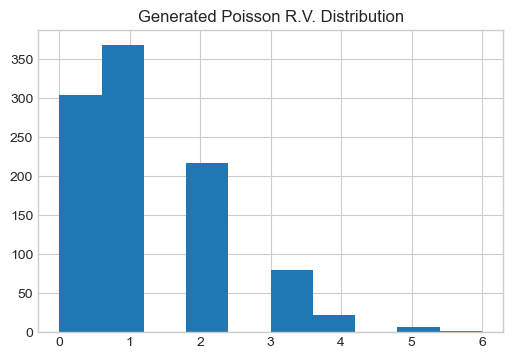

In [58]:
lambdaP = 1.2
poisson = stats.poisson.rvs(lambdaP, size = 1000)

_, ax = plt.subplots(figsize=(6, 4), dpi=100)

h, bins, patches = ax.hist(poisson, bins = 10)
ax.set(title='Generated Poisson R.V. Distribution')
plt.show()

### Moments of Poisson Distribution

In [59]:
lambdaP = 1.2
poiss_stats = stats.poisson.stats(lambdaP, moments='mvsk')
table = Texttable()
table.set_cols_align(["c", "c", 'c', 'c'])
table.set_cols_valign(["m", "m", 'm', 'm'])
table.add_rows(
    [["mean", " variance ", ' skewness ', 'kurtosis '],
     [poiss_stats[0], poiss_stats[1], poiss_stats[2], poiss_stats[3]]])
print(table.draw())

+-------+------------+------------+-----------+
| mean  |  variance  |  skewness  | kurtosis  |
+=======+============+============+===========+
| 1.200 |   1.200    |   0.913    |   0.833   |
+-------+------------+------------+-----------+


## Geometric Distribution

The PMF of **Geometric Distribution** is 
$$
f(k)=p(1-p)^k
$$

where  $k \in  \mathbb{Z}^+$ is a number of failures before first success, and $p$ is the probability of success.

Geometric Distribution is to model the solutions to questions: '_How many times you have to fail in order to embrace the initial success?_'

If you are shooting basketball to the basket, your success rate is $30\%$, what's the probability of first success after $k$ times of trials?

In [60]:
k = 5
p = .3

geo_dist = (1 - p)**k * p
print(
    f'The probability of observing exact {k} times of failures trials before first success is {geo_dist * 100:.2f}%.'
)

The probability of observing exact 5 times of failures trials before first success is 5.04%.


```stats.geom.pmf``` function will do the same trick.

In [61]:
stats.geom.pmf(k, p)

0.07202999999999998

However, you have noticed the same parameters didn't produce the same result. That's because Scipy has a slightly different definition of parameter, $k$ in Scipy means the total number of trials, therefore $k+1$ would work the same.

In [62]:
stats.geom.pmf(k+1, p)

0.05042099999999998

Again, CDF could answer the a question: _What's the probability of observing $k$ or less than $k$ times of failure before the first success?_

In [63]:
geom_cdf = stats.geom.cdf(k + 1, p)
print(
    f'The probability of observing {k:1.0f} or fewer than {k:1.0f} times of failure before a first success is {geom_cdf*100:3.3f}.'
)

The probability of observing 5 or fewer than 5 times of failure before a first success is 88.235.


### Geometric Distribution Moments and Generator

In [64]:
mean, var, skew, kurt = stats.geom.stats(p, moments='mvsk')
table = Texttable()
table.set_cols_align(["c", "c", 'c', 'c', 'c', 'c'])
table.set_cols_valign(["m", "m", 'm', 'm', 'm', 'm'])
table.add_rows([['p', 'k', "mean", " variance ", ' skewness ', ' kurtosis '],
                [p, k, mean, var, skew, kurt]])
print(table.draw())

+-------+---+-------+------------+------------+------------+
|   p   | k | mean  |  variance  |  skewness  |  kurtosis  |
+=======+===+=======+============+============+============+
| 0.300 | 5 | 3.333 |   7.778    |   2.032    |   6.129    |
+-------+---+-------+------------+------------+------------+


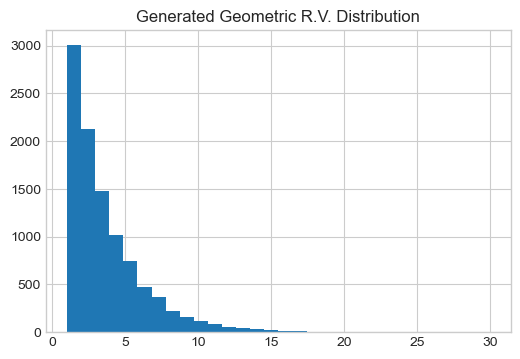

In [67]:
geometric = stats.geom.rvs(p, size=10000)

_, ax = plt.subplots(figsize=(6, 4), dpi=100)

h, bins, patches = ax.hist(geometric, bins=30)
ax.set(title='Generated Geometric R.V. Distribution')
plt.show()

## Hypergeometric Distribution

The main difference between hypergeometric and binomial is that the former's sampling is not independent of each other, i.e. the  sampling is **without replacement**. 

The PMF of hypergeometric is 

$$
f(x) =\frac{{K\choose k} {N-K \choose n-k}}{{N\choose n}} 
$$

Read the PMF with this example: $100$ people live in a building, $20$ of them are stashing drugs, $80$ are clean, but we don't have information who is clean or not. In one field operation, police took away $5$ persons form the building, what is the probability of having exact $2$ persons .are drug stasher?

Solution:
$$
\frac{{20\choose2}{80\choose3}}{{100\choose5}}
$$
To solve it:

In [69]:
k = 2
n = 5
K = 20
N = 100
hyper_geo = special.comb(K, k)*special.comb(N-K, n-k) /special.comb(N, n)
print('The probability of getting {} drug stashers by taking {} persons away is {:.2f}%.'.format(k, n, hyper_geo*100))

The probability of getting 2 drug stashers by taking 5 persons away is 20.73%.


Or use SciPy function

In [70]:
# pmf(x, M, N, n, loc=0)
hgeo = stats.hypergeom.pmf(k, N, K, n, loc = 0)
hgeo

0.20734379349990603

A histogram would provide some intuitions of geometric distribution.

It can be interpreted as: if 100 persons in the building, 20 are drug stasher, take 5 out of 100. The probability of getting from 1 to 5 drug stashers, is shown in the chart. As we can see it is nearly impossible to get 4 or 5 drugs stasher. But getting one is the most possible outcome

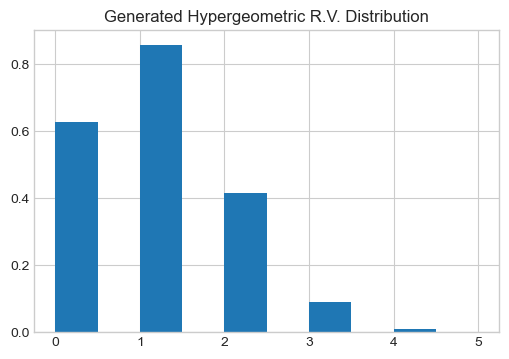

In [73]:
hgeo_rv = stats.hypergeom.rvs(100, 20, 5, size = 10000)

_, ax = plt.subplots(figsize=(6, 4), dpi=100)

h, bins, patches = ax.hist(hgeo_rv, density = True)
ax.set(title='Generated Hypergeometric R.V. Distribution')

plt.show()

In [76]:
mean, var, skew, kurt = stats.hypergeom.stats(N, K, n, moments='mvsk')
table = Texttable()
table.set_cols_align(["c", "c", 'c', 'c', 'c', 'c'])
table.set_cols_valign(["m", "m", 'm', 'm', 'm', 'm'])
table.add_rows([['N', 'k', "mean", " variance ", ' skewness ', ' kurtosis '],
                [N, k, mean, var, skew, kurt]])
print(table.draw())

+-----+---+------+------------+------------+------------+
|  N  | k | mean |  variance  |  skewness  |  kurtosis  |
+=====+===+======+============+============+============+
| 100 | 2 |  1   |   0.768    |   0.629    |   -0.010   |
+-----+---+------+------------+------------+------------+


## Discrete Uniform Distribution

Rolling a die is the simplest **discrete uniform distribution** generator from $1$ to $6$.

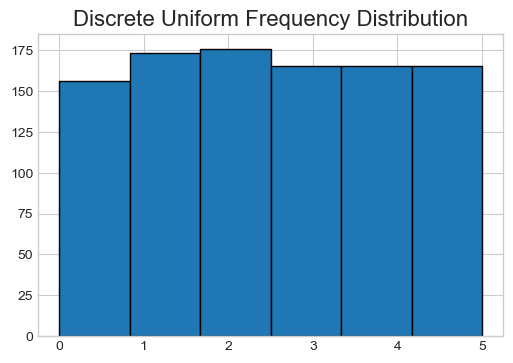

In [78]:
unif_d = stats.randint.rvs(low = 0, high = 6, size = 1000)

_, ax = plt.subplots(figsize=(6, 4), dpi=100)

h, bins, patches = ax.hist(unif_d, bins=6, ec='k')
ax.set_title('Discrete Uniform Frequency Distribution', size=16)
plt.show()

### Discrete Probability Mass Function


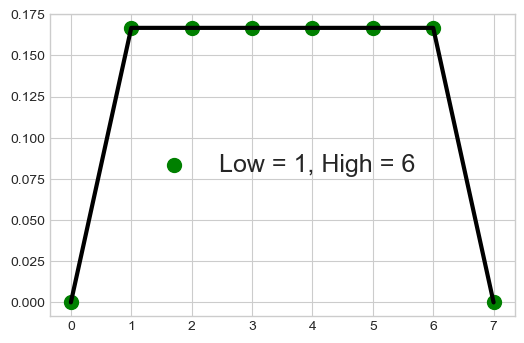

In [79]:
x = np.arange(0, 8)
l, h = 1, 7
unif_pmf = stats.randint.pmf(x, low=l, high=h)

_, ax = plt.subplots(figsize=(6, 4), dpi=100)

ax.scatter(x,
           unif_pmf,
           s=100,
           color='green',
           label=f'Low = {l}, High = {h - 1}')
ax.plot(x, unif_pmf, lw=3, color='k')
ax.legend(fontsize=18, loc='center')
plt.show()

## Continuous Uniform Distribution 

The PDF of *Continuous uniform distribution** is 

$$
\begin{equation}
f(x)=\frac{1}{b-a}
\end{equation}
$$

And its r.v. generator is one of the most commonly used function in NumPy.

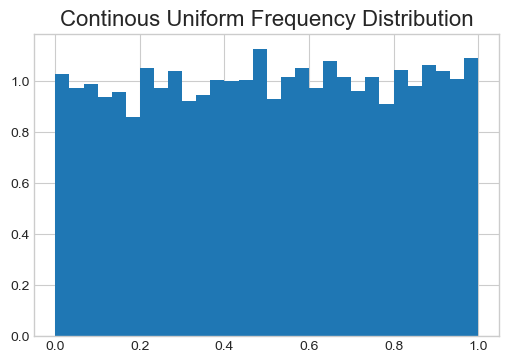

In [82]:
unif = np.random.rand(10000)

_, ax = plt.subplots(figsize=(6, 4), dpi=100)

h, bins, patches = ax.hist(unif, density = True, bins = 30)
ax.set_title('Continous Uniform Frequency Distribution', size = 16)
plt.show()

### CDF and PDF of Continuous Uniform Distribution 

The CDF and PDF of uniform distribution are ```stats.uniform.cdf``` and ```stats.uniform.pdf``` accordingly.

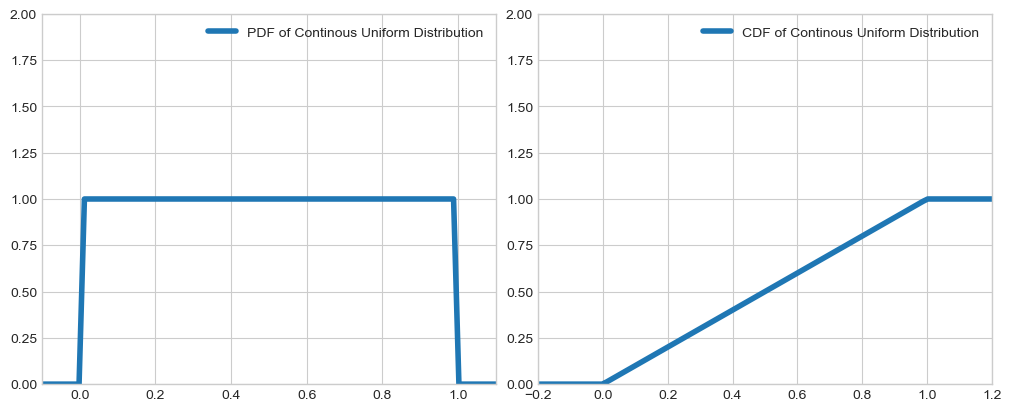

In [85]:
x = np.linspace(-.2, 1.2, 100)
unif_pdf = stats.uniform.pdf(x)
unif_cdf = stats.uniform.cdf(x)

_, axes = plt.subplots(1, 2, figsize=(10, 4), dpi=100, constrained_layout=True)

axes[0].plot(x, unif_pdf, lw=4, label='PDF of Continous Uniform Distribution')
axes[0].set_xlim([-.1, 1.1])
axes[0].set_ylim([0, 2])
axes[0].legend()

axes[1].plot(x, unif_cdf, lw=4, label='CDF of Continous Uniform Distribution')
axes[1].set_xlim([-.2, 1.2])
axes[1].set_ylim([0, 2])
axes[1].legend()
plt.show()

In [86]:
mean, var, skew, kurt = stats.uniform.stats(moments='mvsk')
table = Texttable()
table.set_cols_align([ "c", "c", 'c','c'])  
table.set_cols_valign([ "m", "m", 'm','m'])
table.add_rows([["mean", " variance ", ' skewness ', ' kurtosis '],
                [ mean, var, skew, kurt]])
print(table.draw())

+-------+------------+------------+------------+
| mean  |  variance  |  skewness  |  kurtosis  |
+=======+============+============+============+
| 0.500 |   0.083    |     0      |   -1.200   |
+-------+------------+------------+------------+


## Normal Distribution

The **normal distribution** is the king of all distributions, there are extensive discussions in my <a href="https://nbviewer.jupyter.org/github/WeijieChen-MacroAnalyst/Linear_Algebra_With_Python/blob/master/Chapter%2019%20-%20Multivariate%20Normal%20Distribution.ipynb">Linear Algbra Notes</a>. The PDF of Normal distribution is
$$
f(x)=\frac{1}{σ \sqrt{2 \pi}} e^{-\frac{1}{2}\left(\frac{x-μ}{σ}\right)^{2}}
$$
Below are the plots of CDF and PDF.

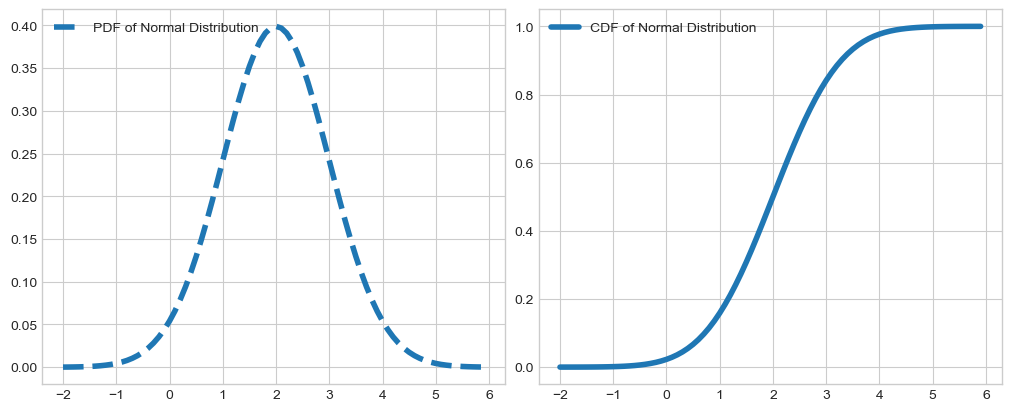

In [87]:
mu = 2
sigma = 1
x = np.arange(-2, 6, 0.1)
norm_pdf = stats.norm.pdf(x, mu, sigma)
norm_cdf = stats.norm.cdf(x, mu, sigma)

_, axes = plt.subplots(1, 2, figsize=(10, 4), dpi=100, constrained_layout=True)

axes[0].plot(x, norm_pdf, lw=4, label='PDF of Normal Distribution', ls='--')
axes[0].legend(loc='upper left')

axes[1].plot(x, norm_cdf, lw=4, label='CDF of Normal Distribution')
axes[1].legend(loc='upper left')
plt.show()

### Inverse Normal CDF

Here is a useful plot that you might have known by heart. The light blue area cover $95\%$ of area under the bell curve, darker blue area on either side covers $2.5\%$ respectively. If we want to search the point where $2.5\%$ area is on its left, we simply need a inverse function of CDF, in SciPy ```.ppf``` (point percentage function) can provide us the location of any percentage that we specify.

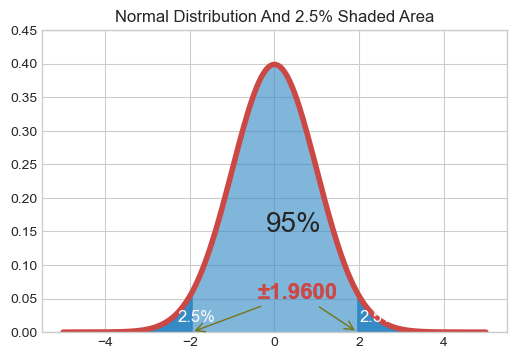

In [88]:
norm_95_r = stats.norm.ppf(
    .975)  # ppf mean point percentage function, actually inverse CDF
norm_95_l = stats.norm.ppf(.025)

x = np.linspace(-5, 5, 200)
y = stats.norm.pdf(x)

xl = np.linspace(-5, norm_95_l, 100)
yl = stats.norm.pdf(xl)
xr = np.linspace(norm_95_r, 5, 100)
yr = stats.norm.pdf(xr)

_, ax = plt.subplots(figsize=(6, 4), dpi=100)

ax.plot(x,
        y,
        lw=4,
        label='PDF of Normal Distribution',
        ls='-',
        color='#CC4845')
ax.set_ylim([0, .45])

ax.fill_between(x, y, 0, alpha=0.6, color='#2E86C3')
ax.fill_between(xl, yl, 0, alpha=0.9, color='#2E86C3')
ax.fill_between(xr, yr, 0, alpha=0.9, color='#2E86C3')

ax.text(-.2, 0.15, '95%', fontsize=20)
ax.text(-2.3, 0.015, '2.5%', fontsize=12, color='white')
ax.text(2.01, 0.015, '2.5%', fontsize=12, color='white')

ax.annotate('±%.4f' % norm_95_r,
            xy=(norm_95_r, 0),
            xytext=(-.4, .05),
            weight='bold',
            color='#CC4845',
            arrowprops=dict(arrowstyle='->',
                            connectionstyle='arc3',
                            color='#757516'),
            fontsize=16)
ax.annotate('±%.4f' % norm_95_r,
            xy=(norm_95_l, 0),
            xytext=(-.4, .05),
            weight='bold',
            color='#CC4845',
            arrowprops=dict(arrowstyle='->',
                            connectionstyle='arc3',
                            color='#757516'),
            fontsize=16)

ax.set(title='Normal Distribution And 2.5% Shaded Area')
plt.show()

### Normal Random Variable Generator

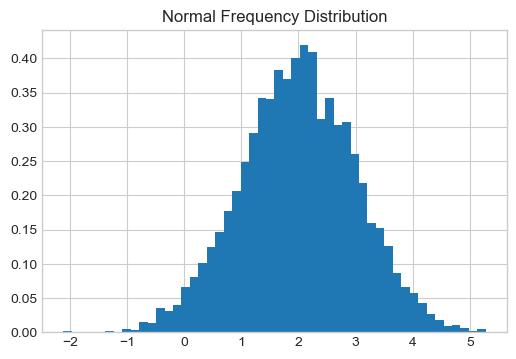

In [89]:
# rvs(loc=0, scale=1, size=1, random_state=None)
norm_rv = stats.norm.rvs(mu, sigma, size=5000)

_, ax = plt.subplots(figsize=(6, 4), dpi=100)

h, bins, patches = ax.hist(norm_rv, density=True, bins=50)
ax.set(title='Normal Frequency Distribution')
plt.show()

In [90]:
mean, var, skew, kurt = stats.norm.stats(mu, sigma, moments='mvsk')
table = Texttable()
table.set_cols_align([ "c", "c", 'c','c'])  
table.set_cols_valign([ "m", "m", 'm','m'])
table.add_rows([["mean", " variance ", ' skewness ', ' kurtosis '],
                [ mean, var, skew, kurt]])
print(table.draw())

+------+------------+------------+------------+
| mean |  variance  |  skewness  |  kurtosis  |
+======+============+============+============+
|  2   |     1      |     0      |     0      |
+------+------------+------------+------------+


## Bivariate Normal Distribution

The most prevalent _multivariate normal distribution_ is **bivariate normal distribution**

$$
\begin{equation}
f_\mathbb{X}(x_1,...,x_2)=\frac{1}{\sqrt{(2\pi)^k|\Sigma|}}\exp{\Big(-\frac{(x-μ)^T\Sigma^{-1}(x-μ)}{2}\Big)}
\end{equation}
$$

There are two ways of formulating a multivariate normal distribution in Python, use any one you see fit.

### 1st Method of Formulation

/var/folders/93/795zm8c93m16_92qkk86t0_r0000gn/T/ipykernel_76649/2552649900.py:19: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


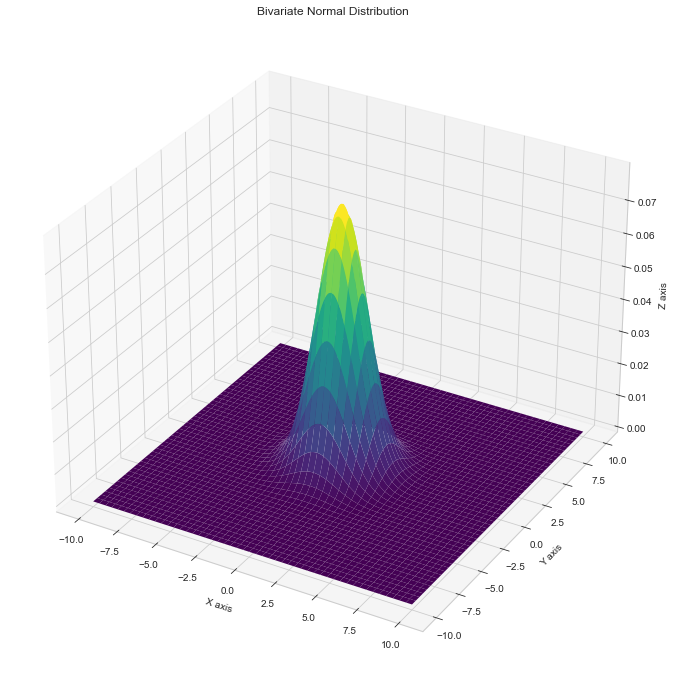

In [91]:
mu_x = 0
sigma_x = 2

mu_y = 0
sigma_y = 2

# Create grid and multivariate normal
x = np.linspace(-10, 10, 500)
y = np.linspace(-10, 10, 500)
X, Y = np.meshgrid(x, y)
pos = np.empty(X.shape + (2, ))
pos[:, :, 0] = X
pos[:, :, 1] = Y  # more technical than next one
norm = stats.multivariate_normal([mu_x, mu_y],
                                 [[sigma_x, 0], [0, sigma_y]])  # frozen

# Make a 3D plot
fig = plt.figure(figsize=(12, 12))
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, norm.pdf(pos), cmap='viridis', linewidth=0)

ax.set(xlabel='X axis',
       ylabel='Y axis',
       zlabel='Z axis',
       title='Bivariate Normal Distribution')

plt.show()

### 2st Method of Formulation

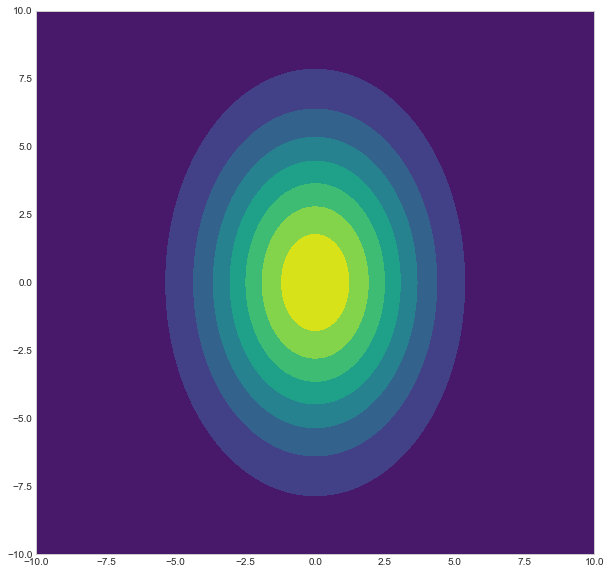

In [92]:
# Parameters to set
mu_x = 0
sigma_x = 7

mu_y = 0
sigma_y = 15

x = np.linspace(-10, 10, 500)
y = np.linspace(-10, 10, 500)
X, Y = np.meshgrid(x, y)

pos = np.array([X.flatten(), Y.flatten()]).T  # more intuitive than former one

rv = stats.multivariate_normal([mu_x, mu_y], [[sigma_x, 0], [0, sigma_y]])

fig = plt.figure(figsize=(10, 10))
ax0 = fig.add_subplot(111)
ax0.contourf(X, Y, rv.pdf(pos).reshape(500, 500), cmap='viridis')

plt.show()

## Beta Distribution

The PDF of **Beta distribution** is 

$$
\begin{equation}
f(x, a, b)=\frac{\Gamma(a+b) x^{a-1}(1-x)^{b-1}}{\Gamma(a) \Gamma(b)}
\end{equation}
$$

where $0\leq x \leq 1$ and $a>0$, $b>0$, $\Gamma$ is the Gamma function, and $a$ and $b$ decide the shape of Beta PDF.

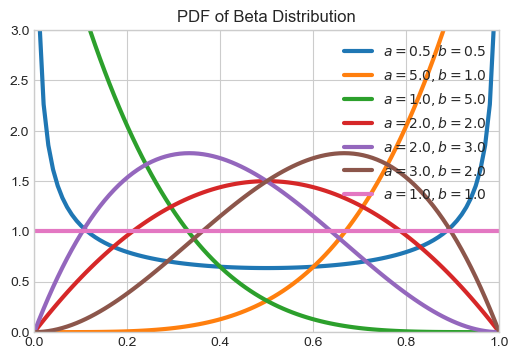

In [99]:
x = np.linspace(0, 1, 100)

_, ax = plt.subplots(figsize=(6, 4), dpi=100)

a = [.5, 5, 1, 2, 2, 3, 1]  # these are values of parameter a
b = [.5, 1, 5, 2, 3, 2, 1]

for parameter in zip(a, b):
    beta_pdf = stats.beta.pdf(x, parameter[0], parameter[1])
    ax.plot(x,
            beta_pdf,
            lw=3,
            label='$a = %.1f, b =  %.1f$' % (parameter[0], parameter[1]))
    ax.legend()

ax.set(title='PDF of Beta Distribution')
ax.axis([0, 1, 0, 3])
plt.show()

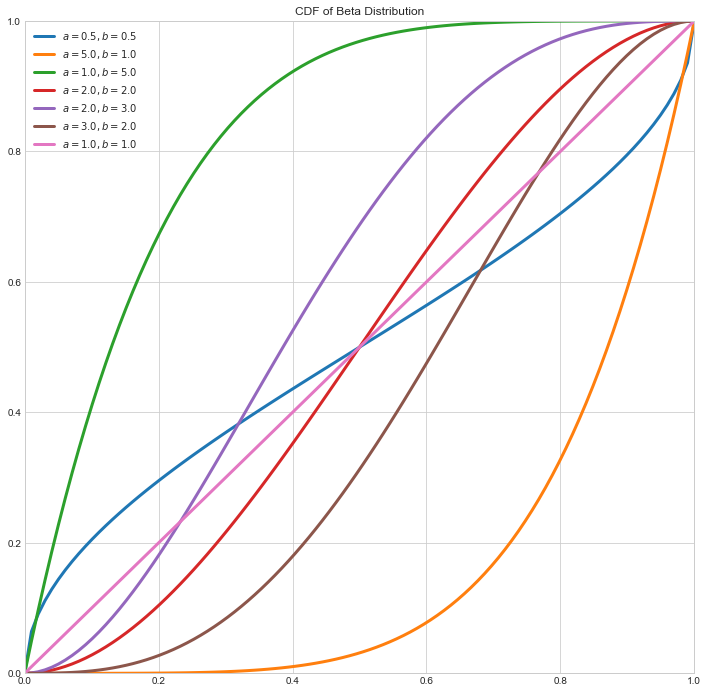

In [94]:
x = np.linspace(0, 1, 100)

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111)

a = [.5, 5, 1, 2, 2, 3, 1]  # these are values of parameter a
b = [.5, 1, 5, 2, 3, 2, 1]

for parameter in zip(a, b):
    beta_pdf = stats.beta.cdf(x, parameter[0], parameter[1])
    ax.plot(x,
            beta_pdf,
            lw=3,
            label='$a = %.1f, b =  %.1f$' % (parameter[0], parameter[1]))
    ax.legend()
ax.set(title='CDF of Beta Distribution')
ax.axis([0, 1, 0, 1])
plt.show()

Beta distribution is mostly useful as **prior distribution** in Bayesian estimation, because it is bounded in $[0, 1]$, that is perfect for modeling the _probability distribution of probabilities_. In Bayesian estimation, we only care about the proportion between prior and posterior, by adjusting $a$ and $b$ we can use Beta distribution to express any kinds of prior beliefs including normal, uniform, exponential distribution and etc.

\begin{equation}
f(x, a, b)\propto x^{a-1}(1-x)^{b-1}
\end{equation}

## $\chi^2$ Distribution

$\chi^2$ distribution is closely connected with normal distributions, if $z$ has the standard normal distribution, then $z^2$ has the $\chi^2$ distribution with $d.f.=1$. And further,if

$$
\begin{equation}
z_1, z_2, ..., z_k \sim i.i.d. N(0, 1)
\end{equation}
$$

Then summation has a $\chi^2$ distribution of $d.f. = k$:

$$
\begin{equation}
\sum_{i=0}^k z_i^2 \sim \chi^2(k)
\end{equation}
$$

We will see in later chapters how $\chi^2$ distribution is referred when performing hypothesis testing.

### $\chi^2$ PDF and CDF

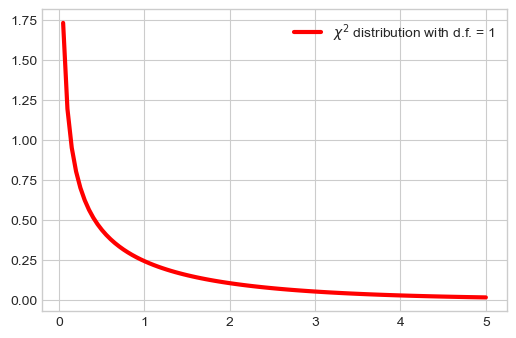

In [95]:
k = 1
x = np.linspace(0, 5, 100)
chi_pdf = stats.chi2.pdf(x, k)

_, ax = plt.subplots(figsize=(6, 4), dpi=100)

ax.plot(x, chi_pdf, lw = 3, c = 'r', label = '$\chi^2$ distribution with d.f. = 1')
ax.legend()
plt.show()

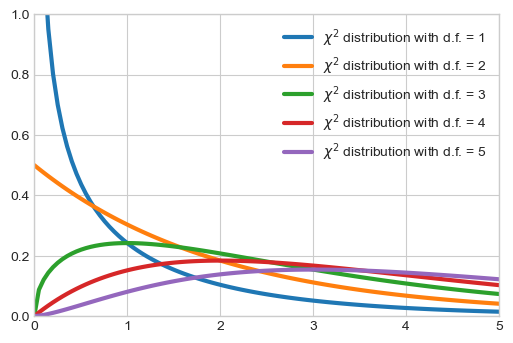

In [96]:
_, ax = plt.subplots(figsize=(6, 4), dpi=100)

for i in range(1, 6):
    x = np.linspace(0, 5, 100)
    chi_pdf = stats.chi2.pdf(x, i)
    ax.plot(x, chi_pdf, lw = 3, label = '$\chi^2$ distribution with d.f. = %.0d'%i)
    ax.legend()
    ax.axis([0, 5, 0, 1])
plt.show()

## F Distribution

If $U_1$ has a $\chi^2$ distribution with $\nu_1$ d.f. and $U_2$ has a $\chi^2$ distribution with $\nu_2$ d.f., then

$$
\begin{equation}
\frac{U_1/\nu_1}{U_2/\nu_2}\sim F(\nu_1, \nu_2)
\end{equation}
$$

We are using $F$ distribution for ratios of variances.

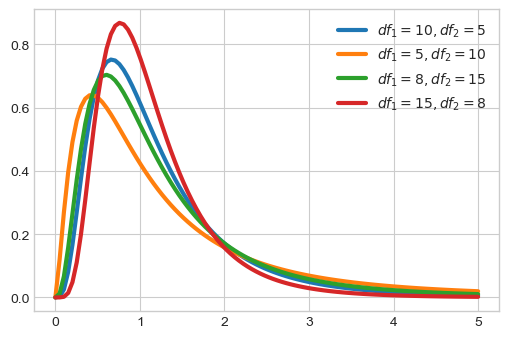

In [97]:
x = np.linspace(0, 5, 100)
_, ax = plt.subplots(figsize=(6, 4), dpi=100)

df1 = [10, 5, 8, 15]
df2 = [5, 10, 15, 8]

for df in zip(df1, df2):
    f_pdf = stats.f.pdf(x, dfn = df[0], dfd = df[0])
    ax.plot(x, f_pdf, lw =3, label = '$df_1 = %.d, df_2 = %.d$' %(df[0], df[1]))
ax.legend()
plt.show()

$\chi^2$ and $F$ distribution are mostly used for statistical testing, we will elaborate the topic later.

## Student's t Distribution

The **t-distribution** is used when data are approximately normally distributed, which means the data follow a bell shape but the population variance is unknown. We will come back to this topic in chapter of estimation.

The PDF of t-distribution is derived from normal and $\chi^2$ distribution
$$
f(t)=\frac{\Gamma\left(\frac{\nu+1}{2}\right)}{\sqrt{\nu \pi} \Gamma\left(\frac{\nu}{2}\right)}\left(1+\frac{t^{2}}{\nu}\right)^{-\frac{\nu+1}{2}}
$$
No need to know the meaning of its components. But we do need a visual memory of the comparison of t-distribution and normal distribution.

If a sample has $n$ observations, then the degree of freedom (d.o.f.) of t-distribution is $n-1$, the larger the d.o.f. the closer to normal distribution.

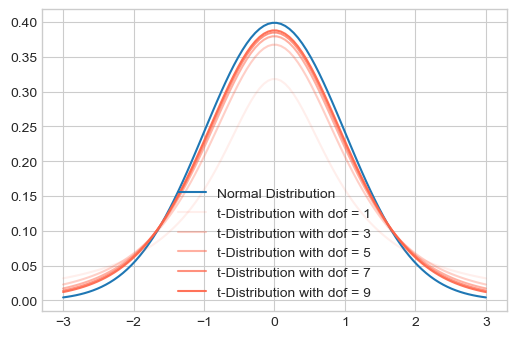

In [100]:
x = np.linspace(-3, 3, 100)
y_norm = stats.norm.pdf(x, loc=0, scale=1)

_, ax = plt.subplots(figsize=(6, 4), dpi=100)

ax.plot(x, y_norm, label='Normal Distribution')

for i in range(1, 11, 2):
    y_t = stats.t.pdf(x, df=i, loc=0, scale=1)
    ax.plot(x,
            y_t,
            color='tomato',
            alpha=.1 * i,
            label=f't-Distribution with dof = {i}')
ax.legend()
plt.show()